## In-class activity: Using modularity

In [1]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
def modularity(G, communities):
    Q=0
    for c in communities:
        mysubgraph=G.subgraph(c)
        sumDegree=0
        for i in c:
            sumDegree+=G.degree(i)
        Q+=mysubgraph.number_of_edges()/G.number_of_edges()-(sumDegree/(2*G.number_of_edges()))**2
    return Q

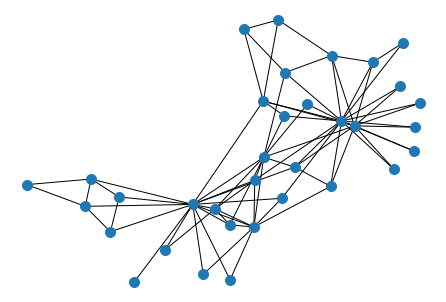

In [3]:
#G=nx.relaxed_caveman_graph(3,10, 0.1)
G=nx.karate_club_graph()
#G=nx.les_miserables_graph()
#G=nx.complete_graph(15)
#G.add_edge(14,15)
#G=nx.barabasi_albert_graph(30,1)
#G=nx.erdos_renyi_graph(30, 0.3)
pos=nx.spring_layout(G)
nx.draw(G, pos, node_size=100)

In [4]:
# Every node is its own community initially.
communities=[]
for i in G.nodes():
    communities.append([i])
print(communities)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33]]


In [5]:
iteration=0
print(modularity(G,communities))

-0.04980276134122286


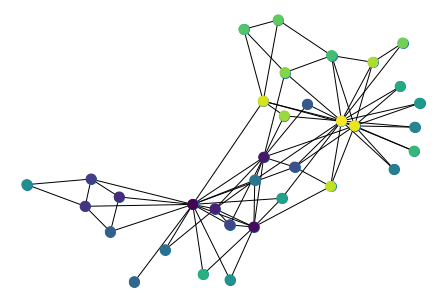

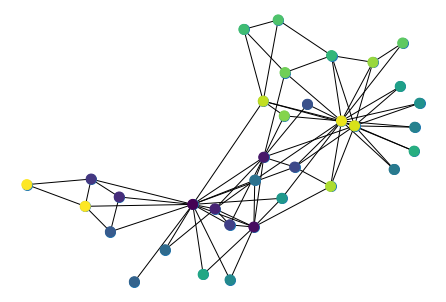

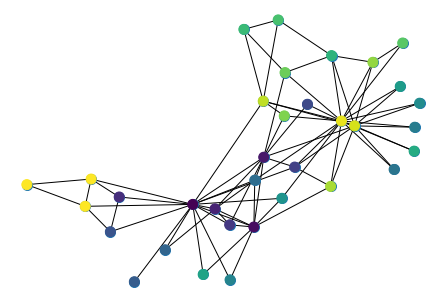

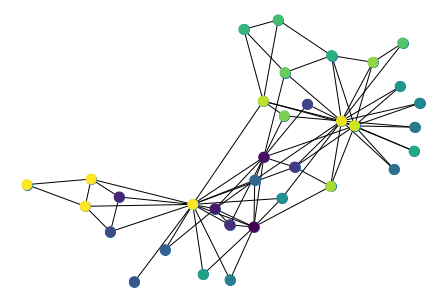

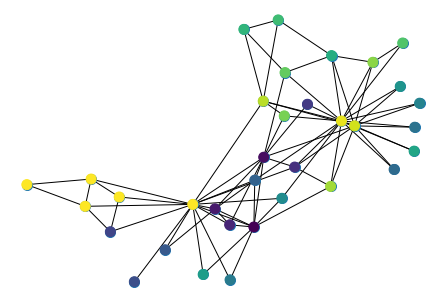

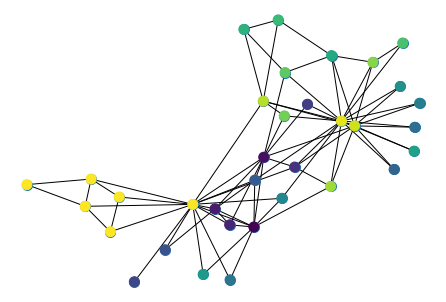

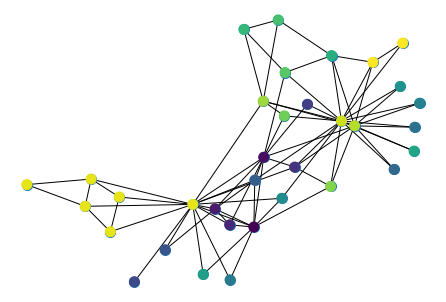

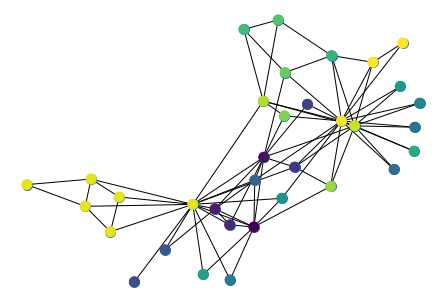

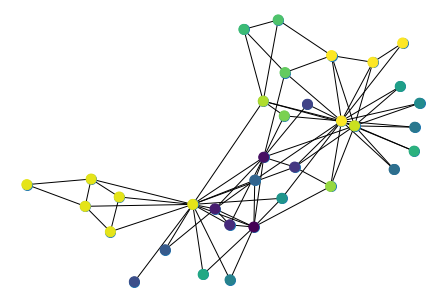

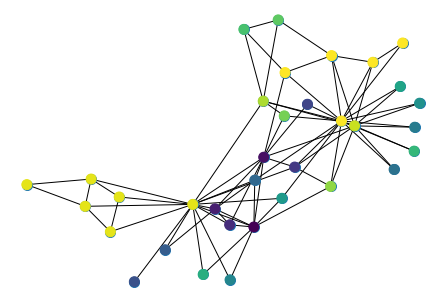

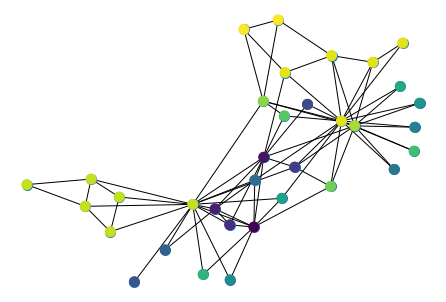

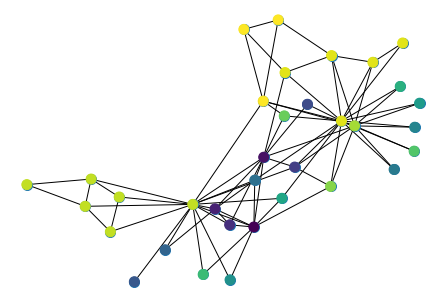

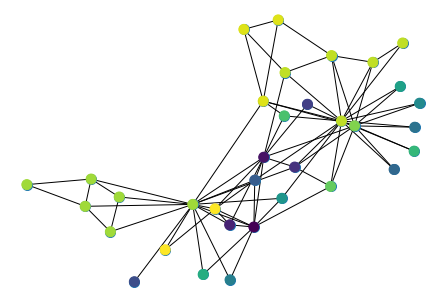

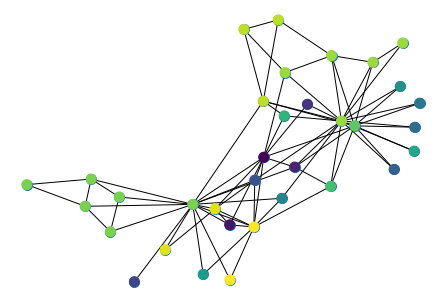

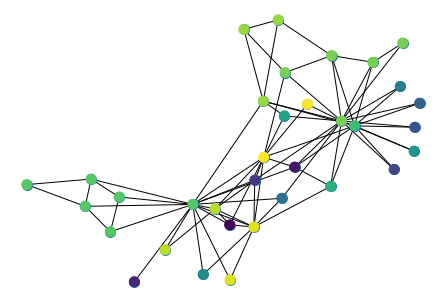

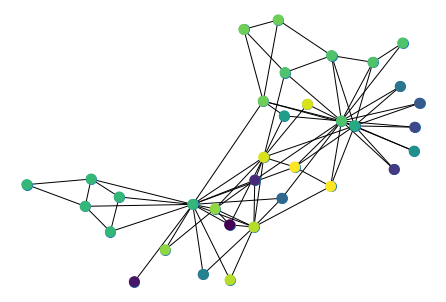

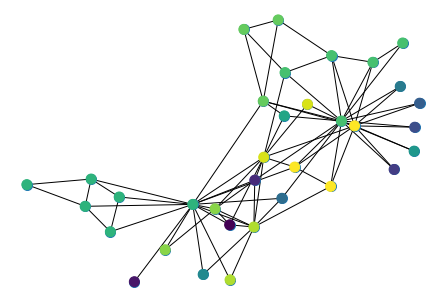

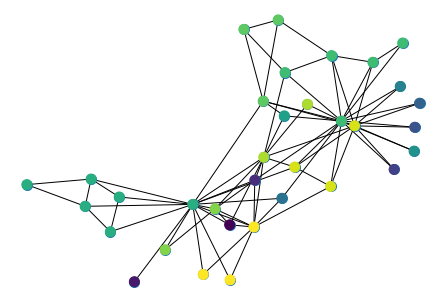

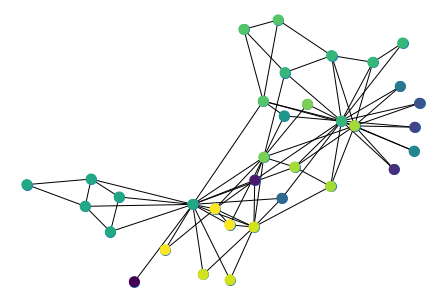

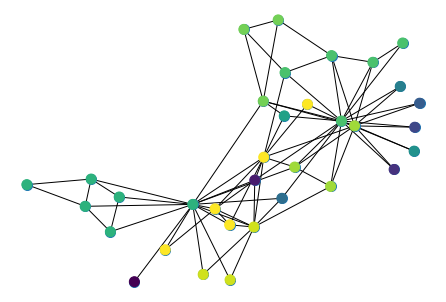

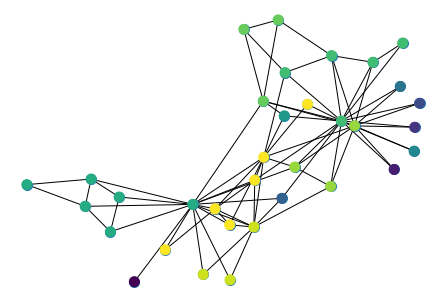

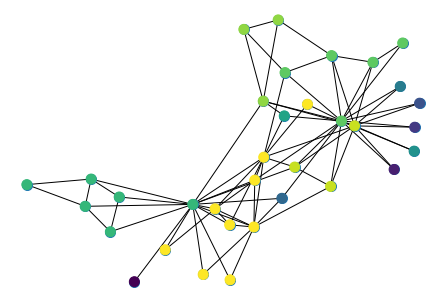

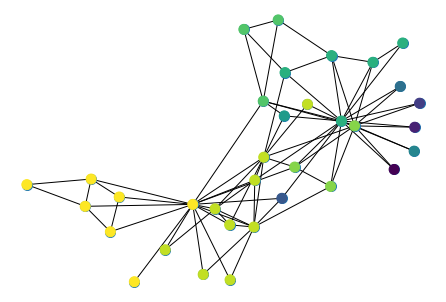

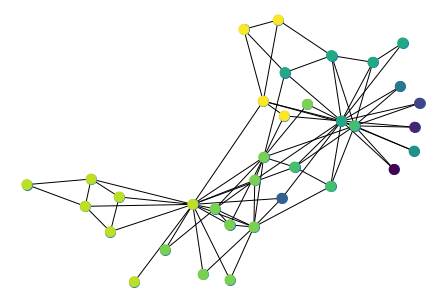

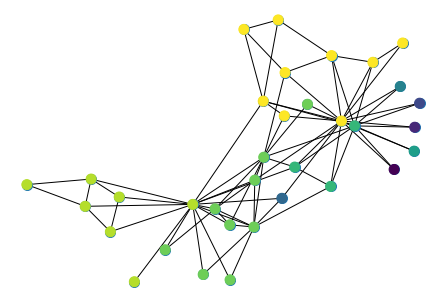

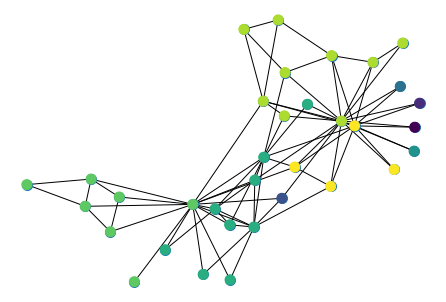

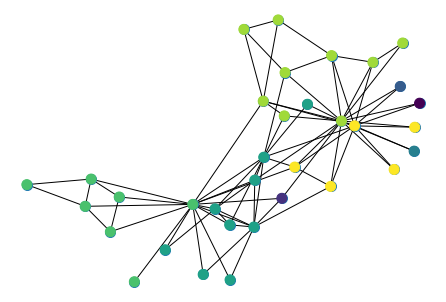

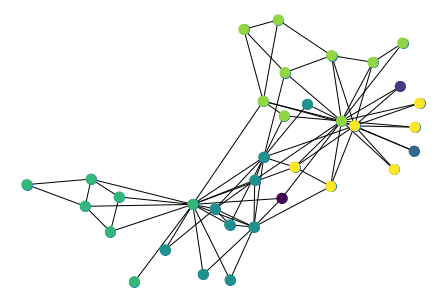

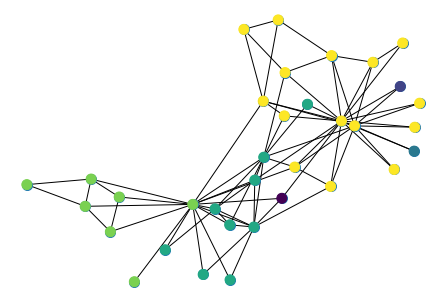

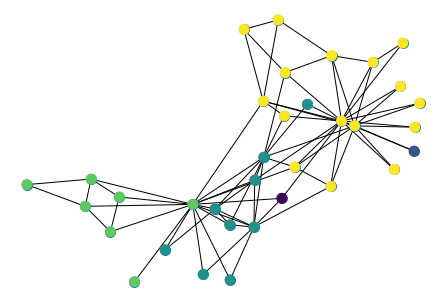

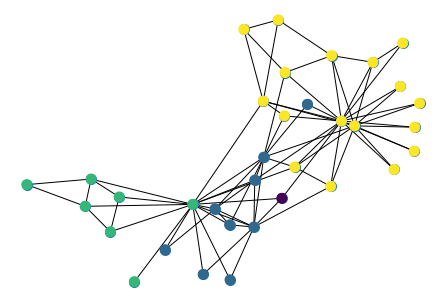

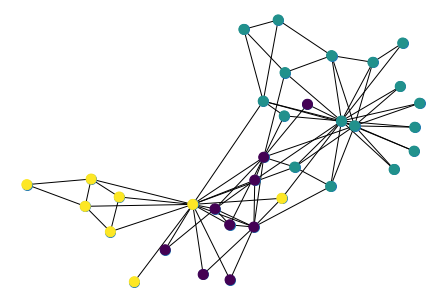

In [6]:
from itertools import combinations
import matplotlib.pyplot as plt
maxModularity=1000
prevModularity=modularity(G, communities)
while maxModularity>0:
    nx.draw(G, pos, node_size=100)
    colors=[]
    for i in G.nodes():
        for j in range(len(communities)):
            if i in communities[j]:
                colors.append(j)
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, node_size=100)
    #plt.savefig("./images/les_mis"+str(iteration)+".png", dpi=300)
    plt.show()
    iteration+=1
    maxModularity=-1
    saveI=-1
    saveJ=-1
    for (i,j) in combinations(communities,2):
        communities2=[]
        for k in communities:
            if k!=i and k!=j:
                communities2.append(k)
        communities2.append(i+j)
        if modularity(G,communities2)-prevModularity>maxModularity:
            maxModularity=modularity(G,communities2)-prevModularity
            saveI=i
            saveJ=j
    if maxModularity>0:
        communities2=[]
        for k in communities:
            communities2.append(k)
        communities=[]
        for k in communities2:
            if k!=saveI and k!=saveJ:
                communities.append(k)
        communities.append(saveI+saveJ)
    prevModularity=modularity(G,communities)
    

Number of communities: 3
Communities: [[21, 1, 17, 13, 2, 9, 7, 3, 12], [22, 20, 27, 23, 33, 26, 29, 28, 31, 24, 25, 18, 15, 14, 32, 8, 30], [19, 11, 10, 4, 0, 6, 5, 16]]
Modularity: 0.3806706114398422


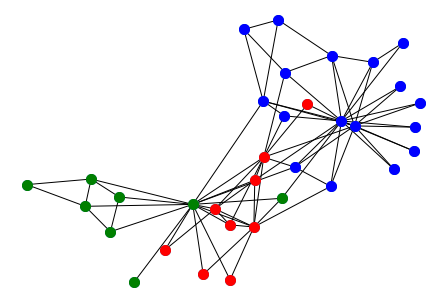

In [7]:
print("Number of communities:", len(communities))
print("Communities:", communities)
print("Modularity:", modularity(G,communities))
colors=['r', 'b', 'g', 'y', 'orange']

nx.draw(G, pos, node_size=100)
comm=0
for c in communities:
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=c, node_color=colors[comm], node_size=100)
    comm+=1
#plt.savefig("./images/les_mis_final.png", dpi=300)

In [8]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G, communities))
print(modularity(G,communities))

0.3806706114398422
0.3806706114398422
